In [132]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
# index_col parameter required as the csv has an Id field that shouldn't be considered a feature 
df_train=pd.read_csv("../data/train.csv",index_col="Id")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Remove outliners from home_prices_data_exploration notebook</h2>

In [134]:
df_train = df_train.drop([1299, 524,333])

<h2>Select features from home_prices_data_exploration notebook</h2>

In [135]:
features_df = pd.concat([df_train['OverallQual'], 
                         df_train['GrLivArea'],
                         df_train['GarageCars'], 
                         df_train['TotalBsmtSF'],
                         df_train['FullBath'],
                         df_train['Neighborhood'],
                         df_train['Condition2'],
                         df_train['RoofMatl'], 
                         df_train['BsmtQual'],
                         df_train['Heating'],
                         df_train['CentralAir'], 
                         df_train['Electrical'],
                         df_train['KitchenQual'], 
                         df_train['GarageType'],
                         df_train['YearBuilt'],
                         df_train['MasVnrType'],
                         df_train['SaleCondition'], 
                         df_train['GarageFinish']],
                         axis=1)

In [136]:
# One-Hot encoding categorical columns
features_df = pd.get_dummies(data=features_df, columns=['Condition2', 'Neighborhood','RoofMatl','BsmtQual',
                                                        'Heating',
                                                        'CentralAir',
                                                        'Electrical',
                                                        'KitchenQual','GarageType',
                                                         'YearBuilt',
                                                        'SaleCondition',
                                                        'MasVnrType',
                                                        'GarageFinish'],dummy_na=True)

In [137]:
features_df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,...,SaleCondition_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,7,1710,2,856,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6,1262,2,1262,2,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,7,1786,2,920,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,7,1717,3,756,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,8,2198,3,1145,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [138]:
target_df = pd.concat([df_train['SalePrice']], axis=1)
target_df.head()

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000


In [139]:
# Lets use PCA to decrease the # of features
#features_df = features_df.fillna(0) # substitute Nan with 0
features_df = features_df.fillna(test_filtered_df.mean()) # substitute Nan with mean



from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca.fit(features_df)
features_df = pca.transform(features_df)

In [140]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features_df, target_df.values, test_size=0.1, random_state=42)

In [141]:
# normalize feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

scaler.fit(features_test)
features_test = scaler.transform(features_test)

In [142]:
features_train[0:5]

array([[0.41819049, 0.6133157 , 0.3823428 , 0.37245799, 0.24696757,
        0.6417916 , 0.45551519, 0.36427411, 0.19693859, 0.84922978],
       [0.55583609, 0.59818384, 0.25883622, 0.53865641, 0.5442448 ,
        0.45447552, 0.50112698, 0.61895235, 0.16653091, 0.55318154],
       [0.36328884, 0.5869455 , 0.24962732, 0.27480073, 0.28226988,
        0.48146678, 0.25823969, 0.20936126, 0.43391479, 0.43378451],
       [0.23910061, 0.40238564, 0.52783102, 0.32962825, 0.57791356,
        0.62163913, 0.36267992, 0.12888546, 0.5591318 , 0.50101427],
       [0.41439205, 0.6847035 , 0.71402088, 0.56302917, 0.40075186,
        0.3467136 , 0.4791098 , 0.40561744, 0.4737605 , 0.31925075]])

In [143]:
features_test[0:5]

array([[0.14838842, 0.30037734, 0.27978335, 0.17965352, 0.69336406,
        0.50324754, 0.45297958, 0.84815379, 0.47630004, 1.        ],
       [0.34189812, 0.1513521 , 0.29005457, 0.19861953, 0.19979674,
        0.32364955, 0.73182535, 0.47563231, 0.55026433, 0.73384096],
       [0.38743538, 0.16266676, 0.18154027, 0.46392397, 0.36865607,
        0.44080204, 0.80611756, 0.67524387, 0.86129061, 0.64455256],
       [0.02356817, 0.77991117, 0.27065542, 0.38202978, 0.24855949,
        0.23902769, 0.44365252, 0.78755836, 0.77699877, 0.55657206],
       [0.44627407, 0.12814418, 0.01830171, 0.83073135, 0.5985343 ,
        0.47950742, 0.83050947, 0.3402841 , 0.49291759, 0.55777088]])

In [144]:
def drawPredictionAgainstReality(pred,reality):
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    fig, ax = plt.subplots(figsize=(5, 5))

    plt.style.use('ggplot')
    plt.plot(pred, reality, 'ro')
    plt.xlabel('Predictions', fontsize = 10)
    plt.ylabel('Reality', fontsize = 10)
    plt.title('Predictions x Reality on dataset Test', fontsize = 15)
    ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
    plt.show()

<h2>Use KerasRegresor from sklearn </h2>

In [145]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add( Dense( input_dim=10, output_dim = 100 ) )
    model.add( Activation( "relu" ) )
    model.add( Dense( 50 ) )
    model.add( Activation( "relu" ) )
    model.add( Dense( 10 ) )
    model.add( Activation( "relu" ) )
    model.add( Dense( 1 ) )
    #model.add( Activation( 'relu' ) )
    #opt = keras.optimizers.Adam(lr=0.1)
    #opt = keras.optimizers.Adadelta()
    opt = keras.optimizers.Adamax()
    #opt = keras.optimizers.SGD()
    model.compile( loss="mean_squared_error",  optimizer=opt )
    return model

In [149]:
# evaluate model with standardized dataset
from keras.callbacks import TensorBoard
from time import time

estimator = KerasRegressor(build_fn = baseline_model,epochs=100,batch_size=10)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
estimator.fit( features_train, labels_train,callbacks=[tensorboard])
pred_y = estimator.predict( features_test )
r2 = r2_score( labels_test, pred_y )
rmse = mean_squared_error( labels_test, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )


Epoch 1/100
1311/1311 [==============================] - 0s 370us/step - loss: 38920951950.1571
Epoch 2/100
1311/1311 [==============================] - 0s 179us/step - loss: 38709863959.0420

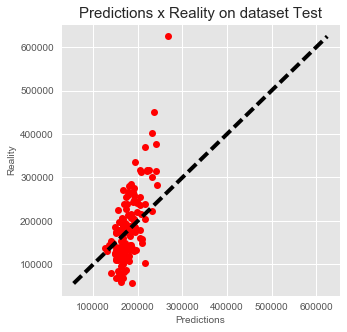

In [111]:
drawPredictionAgainstReality(pred_y,labels_test)

In [116]:
# Create DF from test.csv
df_test = pd.read_csv('../data/test.csv', index_col='Id')
test_filtered_df = pd.concat([df_test['OverallQual'], 
                         df_test['GrLivArea'],
                         df_test['GarageCars'], 
                         df_test['TotalBsmtSF'],
                         df_test['FullBath'],
                         df_test['Condition2'],
                         df_test['RoofMatl'], 
                         df_test['BsmtQual'],
                         df_test['Heating'],
                         df_test['CentralAir'], 
                         df_test['Electrical'],
                         df_test['KitchenQual'], 
                         df_test['GarageType'],
                         df_test['YearBuilt'],
                         df_test['SaleCondition'], 
                         df_test['GarageFinish']],
                         axis=1)

test_filtered_df = pd.get_dummies(data=test_filtered_df, columns=['Condition2', 'RoofMatl','BsmtQual','Heating',
                                                        'CentralAir','Electrical','KitchenQual','GarageType',
                                                       'YearBuilt','SaleCondition','GarageFinish'],dummy_na=True)


#test_filtered_df = test_filtered_df.fillna(0)  # convert Nan to 0
test_filtered_df = test_filtered_df.fillna(test_filtered_df.mean())  # convert Nan to mean of that column


from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca.fit(test_filtered_df)
test_filtered_df = pca.transform(test_filtered_df)

In [117]:
# predict sale price for test
scaler = MinMaxScaler()
scaler.fit(test_filtered_df)
test_input_feature = scaler.transform(test_filtered_df)


preds = estimator.predict(test_filtered_df)

In [118]:
preds[:10]

array([5.8910394e+02, 1.0590759e+06, 6.9640940e+06, 4.5658000e+06,
       1.6338183e+05, 1.3051329e+06, 2.8393884e+02, 3.3169336e+02,
       8.2519906e+05, 5.9866132e+02], dtype=float32)

In [ ]:
from IPython.display import FileLink, FileLinks
my_submission = pd.DataFrame({'Id': df_test.index, 'SalePrice': preds})
my_submission.to_csv('../submissions/submission5.csv', index=False)
FileLink("../submissions/submission5.csv")